In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
import math
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 
from operator import itemgetter

In [2]:
sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
os.chdir("/Users/serrauzun/Desktop/MSDS_422_Practical")

In [4]:
df = pd.read_csv('HMEQ_Loss_clean.csv')

In [5]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,0.000000
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,0.000000,2.000000,0.000000,0.000000,0.000000
CLAGE,94.366667,121.833333,149.466667,173.466667,93.333333
NINQ,1.000000,0.000000,1.000000,1.000000,0.000000


In [6]:
dt = df.dtypes
print(dt)

TARGET_BAD_FLAG    int64  
TARGET_LOSS_AMT    float64
LOAN               int64  
MORTDUE            float64
VALUE              float64
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
REASON_DebtCon     int64  
REASON_HomeImp     int64  
REASON_Missing     int64  
JOB_Mgr            int64  
JOB_Missing        int64  
JOB_Office         int64  
JOB_Other          int64  
JOB_ProfExe        int64  
JOB_Sales          int64  
JOB_Self           int64  
dtype: object


                        ** SPLIT DATA **

Removing target variable from x, and allocating them to a new variable called y.

In [7]:
x = df.copy()
x = x.drop(['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT'], axis = 1)

In [8]:
x.head().T

,0,1,2,3,4
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,0.000000,2.000000,0.000000,0.000000,0.000000
CLAGE,94.366667,121.833333,149.466667,173.466667,93.333333
NINQ,1.000000,0.000000,1.000000,1.000000,0.000000
CLNO,9.000000,14.000000,10.000000,20.000000,14.000000
DEBTINC,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
y = df[['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT']] 

In [10]:
y.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,0.0


Creating a train and test set from both x and y.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [12]:
print("Training:", x_train.shape)
print("Testing:", x_test.shape)

Training: (4688, 20)
Testing: (1173, 20)


                        ** DECISION TREE **

In [13]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

---- DEFAULT PROBABILITY ----

In [14]:
fm01_tree = tree.DecisionTreeClassifier(max_depth = 4)
fm01_tree = fm01_tree.fit(x_train, y_train["TARGET_BAD_FLAG"])

In [15]:
y_pred_train = fm01_tree.predict(x_train)
y_pred_test = fm01_tree.predict(x_test)

In [16]:
print("DECISION TREE\n")
print("Probability of Default")
print("Accuracy Train:", metrics.accuracy_score(y_train["TARGET_BAD_FLAG"], y_pred_train))
print("Accuracy Test:", metrics.accuracy_score(y_test["TARGET_BAD_FLAG"], y_pred_test))

DECISION TREE

Probability of Default
Accuracy Train: 0.8920648464163823
Accuracy Test: 0.8976982097186701


In [17]:
#Train
probs_train = fm01_tree.predict_proba(x_train)
p1 = probs_train[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train["TARGET_BAD_FLAG"], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [18]:
#Test
probs_test = fm01_tree.predict_proba(x_test)
p1 = probs_test[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test["TARGET_BAD_FLAG"], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [19]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

<function matplotlib.pyplot.show(*args, **kw)>

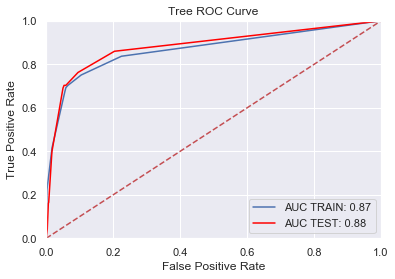

In [20]:
plt.title('Tree ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN: %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST: %0.2f' % roc_auc_test, color = "red")
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show

Both train and test ROC curves are curved towards the True Positive and indicates that our test data is slightly (1%) more accurate than our training data, 88% and 87% respectively. 

In [21]:
feature_cols = list(x.columns.values)
tree.export_graphviz(fm01_tree, out_file = 'tree_f.txt', filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names = ['Good', 'Bad'])
vars_tree_flag = getTreeVars(fm01_tree, feature_cols) 

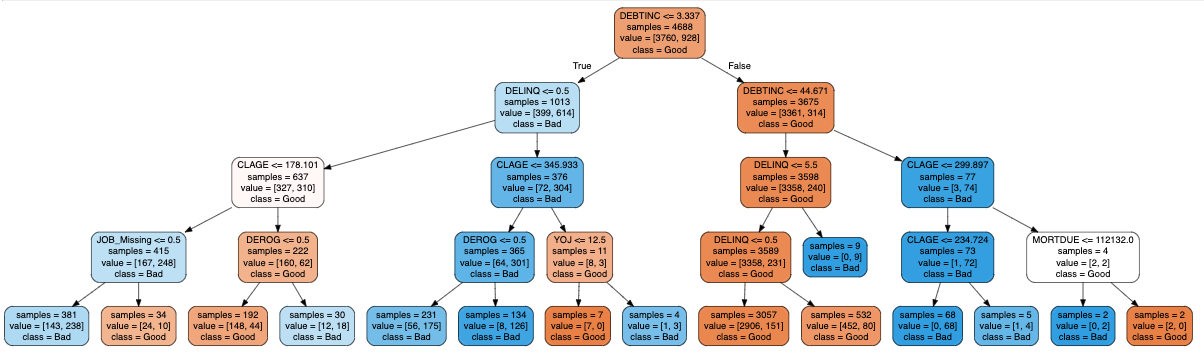

The algorithm we have written have decided to split the data on DEBTINC (Debt to Income Ratio) and 3.337. The data then have incrementally been divided by DELINQ (Delinquencies on your current credit report) and CLAGE (Credit Line Age), then by DEROG (Derogatory Marks on Credit Record), YOJ (Year on Job), JOB (only records with Job as Missing information) and MORTDUE (Current Outstanding Mortgage Balance). Model's chosing of Debt to Income Ratio as the primary indicator does make sense as income is crucial in this context and DEBTINC is the main and only variable related to income. Thus, the obvious correlation between Debt to Income Ratio and the likelihood of credit default is a reasonable outcome of this model that we can accept.

Looking at the Decision Tree our algorithm has given us, we can see that person with DEBTINC less than 3.337, DELINQ less than 0.5, CLAGE less than 346, DEROG less than 0.5 are in the worst class whereas people with DEBTINC higher than 3.357 and less than 44.671, and DELINQ of less than 0.5 are the ones that are least likely to default. 

In [22]:
print( "FLAG=",vars_tree_flag)

FLAG= ['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'DEBTINC', 'JOB_Missing']


The variables listed above are the top indicators of a possible Home Equity Credit Default.

---- LOSS PREDICTION ----

In [23]:
y_train.head(20).T

,4925,1447,1909,4244,4821,2544,2918,2646,3680,2064,4324,3645,203,5411,3747,4110,2611,2573,4949,2037
TARGET_BAD_FLAG,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TARGET_LOSS_AMT,0.0,0.0,0.0,0.0,0.0,15873.0,0.0,0.0,0.0,0.0,0.0,0.0,5218.0,0.0,0.0,0.0,0.0,0.0,0.0,14062.0


In [24]:
not_zero = y_train['TARGET_LOSS_AMT'] != 0

In [25]:
not_zero.head(10).T

4925    False
1447    False
1909    False
4244    False
4821    False
2544    True 
2918    False
2646    False
3680    False
2064    False
Name: TARGET_LOSS_AMT, dtype: bool

We previously replaces NaN variables with 0 during our EDA and Data Imputation, now we are going to remove all TARGET_LOSS_AMT cells with 0 as we would like to predict the loss amount, only in case the credit got defaulted.

In [26]:
w_train = x_train[not_zero]
z_train = y_train[not_zero]

In [27]:
not_zero = y_test['TARGET_LOSS_AMT'] != 0
w_test = x_test[not_zero]
z_test = y_test[not_zero]

In [28]:
#print("Training:", w_train.shape)
#print("Test:", z_test.shape)

In [29]:
amt_m01_tree = tree.DecisionTreeRegressor(max_depth = 2)
amt_m01_tree = amt_m01_tree.fit(w_train, z_train['TARGET_LOSS_AMT'])

In [30]:
z_pred_train = amt_m01_tree.predict(w_train)
z_pred_test = amt_m01_tree.predict(w_test)

In [31]:
print("Mean Train:", z_train['TARGET_LOSS_AMT'].mean())
print("Mean Test:", z_test['TARGET_LOSS_AMT'].mean())

Mean Train: 13009.997844827587
Mean Test: 13599.351694915254


It is a positive sign that train and test mean are close to each other. Three seems to be the ideal max_depth for Decision Tree Regressor. Having only 590 difference between test and training means, we can accept this result and continue with the model.

In [190]:
rmse_train = math.sqrt(metrics.mean_squared_error(z_train['TARGET_LOSS_AMT'],z_pred_train))
rmse_test = math.sqrt(metrics.mean_squared_error(z_test['TARGET_LOSS_AMT'],z_pred_test))

In [191]:
print("Tree RMSE Train:", rmse_train)
print("Tree RMSE Test:", rmse_test)

Tree RMSE Train: 6034.68031234315
Tree RMSE Test: 7565.804740924383


Per Decision Tree Regressor, RMSE (square root of means_squared_error) gives us 5,018 dollars of potential loss on training set and 6,640 dollars loss on the test set, given the max depth level of regressor is 3. Even though the train and test rmse gets slightly closer to each other when max depth is decreased to 2, for this analysis it is preferred not to take the depth any less than 3.  

In [192]:
rmse_tree = rmse_test

In [193]:
feature_cols = list(x.columns.values)
vars_tree_amt = getTreeVars(amt_m01_tree, feature_cols)
tree.export_graphviz(amt_m01_tree, out_file= 'tree_a.txt', filled = True, rounded = True, feature_names = feature_cols, impurity = False, precision = 0)

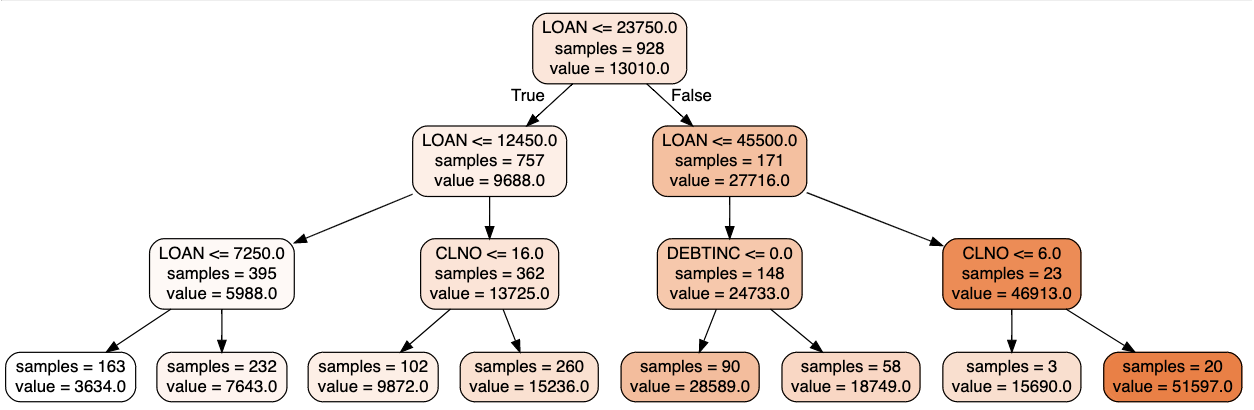

In [232]:
for i in vars_tree_amt :
    print(i)

LOAN


Our Decision Tree Regressor model that we ran for TARGET_LOSS_AMT (Target value - the loss amount in case credits get defaulted) the top indicators are LOAN (HMEQ Credit Line), CLNO (Number of credit lines you have) and DEBTINC (Debt to Income Ratio). Per the model, the amount of loan/credit taken by the person is the primary indicator of the loss amount in case the credit defaults. This is a reasonable outcome as the loan amount and the amount that the person won't be able to pay in case of a default can be correlated, thus the results is acceptable.

Finally, here are the list of variables that are top indicators for both Target Values:

In [195]:
print( "FLAG=",vars_tree_flag)
print("AMOUNT=",vars_tree_amt)

FLAG= ['MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'DEBTINC', 'JOB_Missing']
AMOUNT= ['LOAN']


** RANDOM FOREST **

In [196]:
def getEnsembleTreeVars(ENSTREE, varNames):
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

In [197]:
fm01_RF = RandomForestClassifier(n_estimators = 25, random_state = 1)
fm01_RF = fm01_RF.fit(x_train, y_train['TARGET_BAD_FLAG'])

In [198]:
y_pred_train = fm01_RF.predict(x_train)
y_pred_test = fm01_RF.predict(x_test)

In [199]:
print("RANDOM FOREST\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(y_train['TARGET_BAD_FLAG'], y_pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test['TARGET_BAD_FLAG'], y_pred_test))

RANDOM FOREST

Probability of Default
Accuracy Train: 1.0
Accuracy Test: 0.9173060528559249


As we had 100 decision trees through out Random Forest Classifier model, we got 100% accuracy on our training set. The training set is not the approperiate indicator of our models indicator, but our test set accuracy is also high, at 92%. Thus, we can say that the random forest classifier model is going to give use an result that is accurate over 90%.  

In [200]:
probs = fm01_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train['TARGET_BAD_FLAG'], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [201]:
probs = fm01_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test['TARGET_BAD_FLAG'], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [202]:
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [203]:
def getEnsembleTreeVars(ENSTREE, varNames):
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index:
        imp_val = importance[i]
        if imp_val > np.average(ENSTREE.feature_importances_):
            v = int(imp_val / np.max(ENSTREE.feature_importances_)*100)
            theList.append((varNames[i], v))
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

In [204]:
feature_cols = list(x.columns.values)
vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)

In [205]:
for i in vars_RF_flag :
    print( i )

('DEBTINC', 100)
('CLAGE', 32)
('DELINQ', 29)
('LOAN', 29)
('VALUE', 28)
('CLNO', 25)
('MORTDUE', 25)
('YOJ', 20)


The variables that are most important to look at to predict if a credit is going to get defaulted are DEBTINC and CLAGE followed by DELINQ and LOAN. This output is parallel with the results we obtained through our decision tree above.

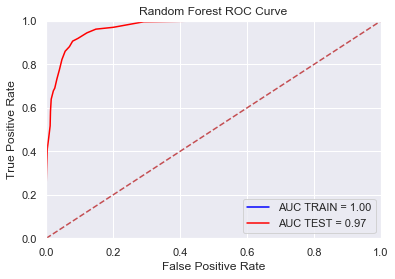

In [206]:
plt.title('Random Forest ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train, color = "blue")
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---- LOSS PREDICTION ----

In [207]:
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit(w_train, z_train['TARGET_LOSS_AMT'])

In [208]:
z_pred_train = amt_m01_RF.predict(w_train)
z_pred_test = amt_m01_RF.predict(w_test)

In [209]:
rmse_train = math.sqrt(metrics.mean_squared_error(z_train['TARGET_LOSS_AMT'], z_pred_train))
rmse_test = math.sqrt(metrics.mean_squared_error(z_test['TARGET_LOSS_AMT'], z_pred_test))

In [210]:
print("RF RMSE Train:", rmse_train)
print("RF RMSE Test:", rmse_test)

RF RMSE Train: 1150.0368325181048
RF RMSE Test: 4080.532732350871


In [211]:
rmse_RF = rmse_test

In [212]:
feature_cols = list(x.columns.values)
vars_RF_amt = getEnsembleTreeVars(amt_m01_RF, feature_cols)

In [213]:
for i in vars_RF_amt:
    print(i)

('LOAN', 100)
('CLNO', 11)
('DEBTINC', 9)


LOAN is a significantly more dominant indicator of the Loss Amount than any other variables in the dataset. The Random Forest model output is parallel with Decision Tree model output and LOAN being the primary indicator variable for loss amount makes sense.

** GRADIENT BOOSTING **

In [214]:
fm01_GB = GradientBoostingClassifier(random_state = 1)
fm01_GB = fm01_GB.fit(x_train, y_train['TARGET_BAD_FLAG'])

In [215]:
y_pred_train = fm01_GB.predict(x_train)
y_pred_test = fm01_GB.predict(x_test)

In [216]:
print("GRADIENT BOOSTING\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(y_train['TARGET_BAD_FLAG'], y_pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test['TARGET_BAD_FLAG'], y_pred_test))

GRADIENT BOOSTING

Probability of Default
Accuracy Train: 0.9204351535836177
Accuracy Test: 0.9147485080988917


In [217]:
probs = fm01_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train['TARGET_BAD_FLAG'], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [218]:
probs = fm01_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test['TARGET_BAD_FLAG'], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [219]:
fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [220]:
feature_cols = list(x.columns.values)
vars_GB_flag = getEnsembleTreeVars(fm01_GB, feature_cols)

In [221]:
for i in vars_GB_flag:
    print(i)

('DEBTINC', 100)
('DELINQ', 14)
('CLAGE', 13)


DEBTINC is the most important variable for predicting the default probability. Again, this results is not only parallel with the Decision Tree and Random Forest output but theoratically makes sense that debt to income ratio is the primary indicator of a credit default as the income plays a crucial part in the 're-payment'. 

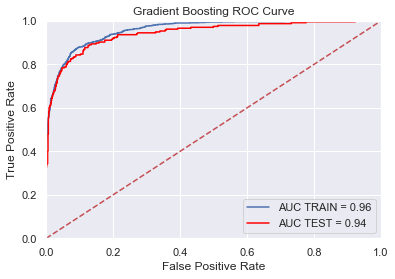

In [222]:
plt.title('Gradient Boosting ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Our Gradient Boosting model got 96% accuracy with the training dataset and 94% accuracy with the test dataset. The accuracy score and ROC Curve shows us that overall both our test and traning set are accurately able to predict default probability. 

---- LOSS PREDICTION ----

In [223]:
amt_m01_GB = GradientBoostingRegressor(random_state = 1)
amt_m01_GB = amt_m01_GB.fit(w_train, z_train['TARGET_LOSS_AMT'])

In [224]:
z_pred_train = amt_m01_GB.predict(w_train)
z_pred_test = amt_m01_GB.predict(w_test)

In [225]:
rmse_train = math.sqrt(metrics.mean_squared_error(z_train['TARGET_LOSS_AMT'], z_pred_train))
rmse_test = math.sqrt(metrics.mean_squared_error(z_test['TARGET_LOSS_AMT'], z_pred_test))

In [226]:
print("GB RMSE Train:", rmse_train)
print("GB RMSE Test:", rmse_test)

GB RMSE Train: 1165.2747848893769
GB RMSE Test: 3147.637470120193


In [227]:
rmse_GB = rmse_test

In [228]:
feature_cols = list(x.columns.values)
vars_GB_amt = getEnsembleTreeVars(amt_m01_GB, feature_cols)

In [229]:
for i in vars_GB_amt:
    print(i)

('LOAN', 100)
('CLNO', 12)
('DEBTINC', 9)


Parallel with our previous models, LOAN is the variable that is the top indicator for the loss amount. 

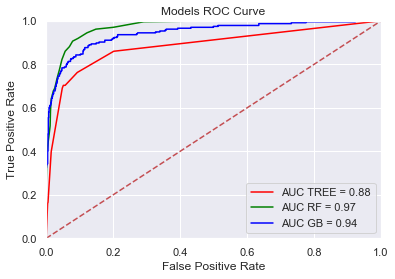

In [230]:
plt.title('Models ROC Curve')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [231]:
print("Root Mean Square Average For Damages")
print("TREE", rmse_tree)
print("RF", rmse_RF)
print("GB", rmse_GB)

Root Mean Square Average For Damages
TREE 7565.804740924383
RF 4080.532732350871
GB 3147.637470120193


Finally, looking at the ROC curves for Decision Tree, Random Forest and Gradient Boosting models, we can see that Random Forest model is the most accurate out of all three in predicting the default probability. The root mean square averages from all three models approximately range between 3.1k and 6.7k. The probable loss amount through a defaulted credit is likely to be somewhere between 4,000 dollars, as we would rely on the RF mean due to its accuracy. 